# Where to focus a marketing campaign?

As a data analyst at a crowfunding site for the next quarter the company will be running a marketing campaign, whos target are those that have donated the most in the past year. For this we will be creating a graph to simplify this task and then present it in the upcoming meeting with the CEO. 

## 💾 The data

#### Historic crowdfunding donations
- "category" - "Sports", "Fashion", "Technology", etc.
- "device" - the type of device used.
- "gender" - gender of the user.
- "age range" - one of five age brackets.
- "amount" - how much the user donated in Euros.

In [1]:
#libraries used
import seaborn as sns
import pandas as pd
import plotly.express as px
import matplotlib.pyplot as plt

#dataframe
df = pd.read_csv('./data/crowdfunding.csv')
df.head()

,category,device,gender,age,amount
0,Fashion,iOS,F,45-54,61.0
1,Sports,android,M,18-24,31.0
2,Technology,android,M,18-24,39.0
3,Technology,iOS,M,18-24,36.0
4,Sports,android,M,18-24,40.0


# Report
## 1. Top Three Donation Categories
In terms of total donations, the top three categories are:
- 🎮 **Games** with a revenue of €16.54k (4173 entries)
- ⚽ **Sports** with a revenue of €16.35k (4179 entries)
- 📱 **Technology** with a revenue of €16.27k (4144 entries)

Environment 🌿 and  Fashion 👗 are also notable (Enviroment with a revenue of €16.23k (4089 entries), Fashion with a revenue of €15.99k (4073 entires)) .

## 2. Leading Device for Contributions
The historical contributions by device type are as follows:
- iOS users: 13,459 (65%)
- Android users: 7,199 (35%)

Total donations:
- Android: €283.54k
- iOS: €530.52k

Total donations per gender: 
- 📱  Android ( M - 132.6k € || F - 130.8k € )
- 🍏 iOS     ( F -  247.9k € || M - 244.9k €)

iOS dominates contributions, especially among females. 👩‍🦰

Device with the most contributions: **iOS** 📱

## 3. Target Age Bracket
The [18-24] age bracket is the most prominent with 10,439 users and an even donation ratio. Targeting this group is recommended, but considering the [25-34] range might also be beneficial.

Recommended age bracket for the campaign: **[18-24]** 🎯

# Graph for upcoming meeting

In [13]:
df_plot = df.groupby(by=['category','gender','age','device'])['amount'].sum().reset_index()

fig = px.bar(df_plot, x = 'category', y = 'amount', color = 'gender',facet_row = 'device', facet_col = 'age')
fig.update_layout(title={'text' : "Amount donated by category"})
fig.show()

# Exploratory Data Analysis (EDA) 

In [23]:
#Info
df.info()

#Count by Categories
print(df.category.unique())
print(df.category.value_counts())

#Count by Device settings
print(df.device.unique())
print(df.device.value_counts(normalize=False))
print(df.device.value_counts(normalize=True))

#Count by gender
print(df.gender.unique())
print(df.gender.value_counts())

#Count by age
print(df.age.unique())
print(df.age.value_counts())


['Fashion' 'Sports' 'Technology' 'Games' 'Environment']
Sports         4179
Games          4173
Technology     4144
Environment    4089
Fashion        4073
Name: category, dtype: int64
['iOS' 'android']
iOS        13459
android     7199
Name: device, dtype: int64
iOS        0.651515
android    0.348485
Name: device, dtype: float64


               amount
category             
Fashion      159952.0
Environment  162376.0
Technology   162731.0
Sports       163528.0
Games        165483.0


<AxesSubplot: ylabel='category'>

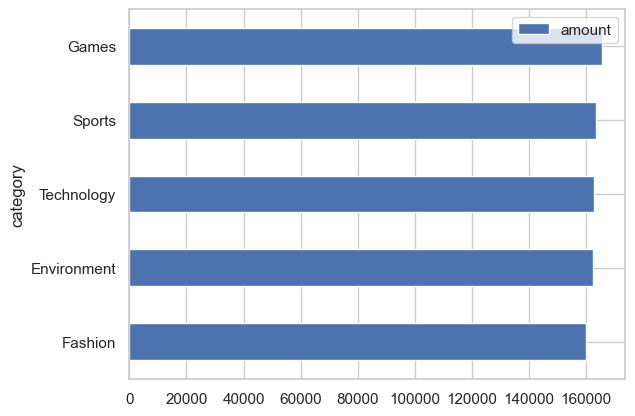

In [27]:
x = df.groupby(by=['category'])[['amount']].sum().sort_values(by='amount',ascending=True)
#print(x)
x.plot(kind='barh')

                  amount
device  gender          
android F       130805.0
        M       132645.0
        U        20095.0
iOS     F       247974.0
        M       244908.0
        U        37643.0


<AxesSubplot: ylabel='device,gender'>

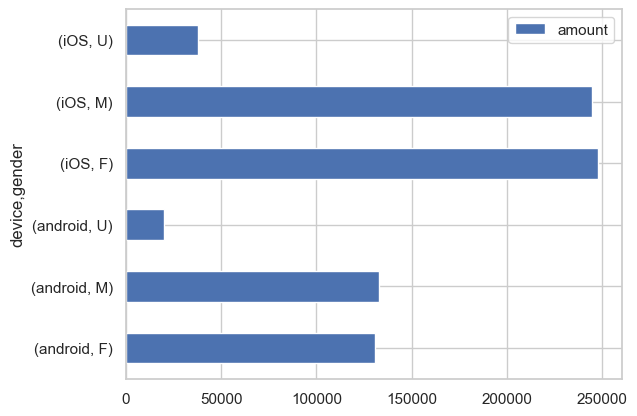

In [25]:
y = df.groupby(by=['device','gender'])[['amount']].sum()
#print(y)
y.plot(kind='barh')

<AxesSubplot: ylabel='age,gender'>

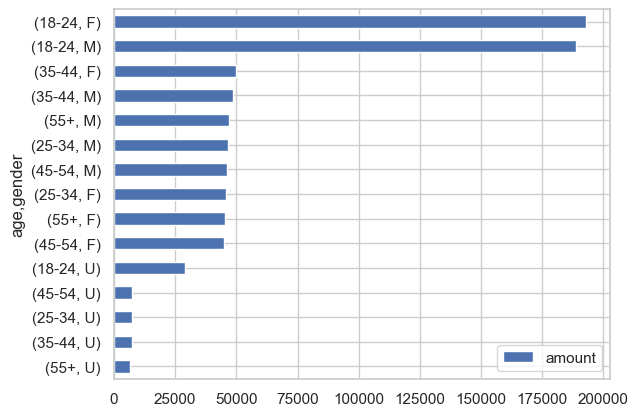

In [28]:
z = df.groupby(by=['age','gender'])[['amount']].sum().sort_values(by='amount',ascending=True)
#print(z)
z.plot(kind='barh')